# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Iuliia Oblasova*
Netid:  *io26*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

###KNN function
def knn_classif(dataset, centroid=2, plots = True, plot_final = True):
    ## Random assign start
    index = np.random.choice(dataset[0].shape[0], centroid, replace = False)
    #assign N random centroids
    centroids = dataset[0][index]
     
    #Calculate distances
    distances = np.zeros((dataset[0].shape[0],centroid))
    for ncent in range(0, centroid):
        distn = np.sqrt(np.sum((dataset[0]-centroids[ncent])**2,axis = 1))
        distances[:,ncent] = distn
    labels = np.argmin(distances, axis=1)
    if plots:
        plt.scatter(x = dataset[0][:,0],y = dataset[0][:,1], color = [colors[col] for col in labels], alpha= 0.4)
        plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c=[colors[col] for col in range(0,centroid)])
        plt.title('First labels assigned')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
    #Recalculate centroid using labels (mean x, mean y)
    for cent in range(0,centroid):
        centroids[cent] = dataset[0][labels == cent].mean(axis = 0) #it calculates the centroid for each labeled class
    #Ploting  new initial centroids.
    if plots:
        plt.scatter(x = dataset[0][:,0],y = dataset[0][:,1], color = [colors[col] for col in labels], alpha= 0.4)
        plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c=[colors[col] for col in range(0,centroid)])
        plt.title('Centroids initialized')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
    #Initial condition: the loop recalculates new centrodis and relabels the datapoints until it converges.
    #Calculate distance difference between previous centroid
    old_centroids = np.zeros(centroids.shape)
    cent_dist = np.linalg.norm(centroids - old_centroids, axis=None) # axis None output is only a number
    iteration = 0
    #Threshold to stop the loop when converges
    while cent_dist != 0: 
        old_centroids = np.copy(centroids) 
        
        for ncent in range(0,centroid):
            distn = np.sqrt(np.sum((dataset[0]-centroids[ncent])**2,axis = 1))
            distances[:,ncent] = distn
        labels = np.argmin(distances, axis=1)
        #calculate new centroid
        for cent in range(0,centroid):
            centroids[cent] = dataset[0][labels == cent].mean(axis = 0) 
        iteration += 1
        cent_dist = np.linalg.norm(centroids - old_centroids, axis=None)
        if iteration > 500: break
            
    #Ploting  final clusters
    if plot_final:
        plt.scatter(x = dataset[0][:,0],y = dataset[0][:,1], color = [colors[col] for col in labels], alpha= 0.4)
        plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c=[colors[col] for col in range(0,centroid)])    
        plt.title('Final clusters for K = %d' % centroid)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
    #Calculate SSE
    SSE = 0    
    for K in range(0,centroid):
        l2 = np.linalg.norm((dataset[0][labels == K] - centroids[K]), axis=1)**2
        SSE = SSE + l2.sum()
    return SSE

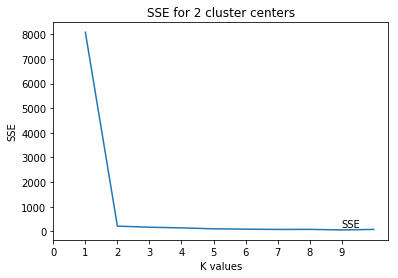

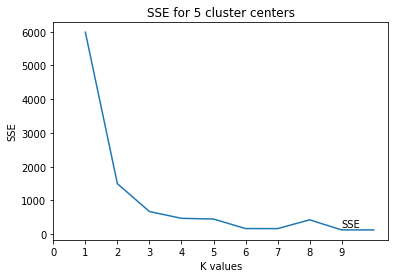

In [4]:
#Plotting SSE for different K_values
dataset = make_blobs(n_features=2, centers=2)
all_SSE = []
for k in range(1,11):
    all_SSE.append(knn_classif(dataset, centroid=k, plots = False, plot_final=False))

plt.plot(range(1,11),all_SSE)
plt.xticks(np.arange(10))
plt.xlabel('K values')
plt.ylabel('SSE')
plt.title('SSE for 2 cluster centers')
plt.text(x=9, y=150, s='SSE')
plt.show()
dataset = make_blobs(n_features=2, centers=5)
all_SSE = []
for k in range(1,11):
    all_SSE.append(knn_classif(dataset, centroid=k, plots = False, plot_final=False))

plt.plot(range(1,11),all_SSE)
plt.xticks(np.arange(10))
plt.xlabel('K values')
plt.ylabel('SSE')
plt.title('SSE for 5 cluster centers')
plt.text(x=9, y=200, s='SSE')
plt.show()

For 2 cluster centers, an elbow is at k = 2 because an initial data set has 2 clearly separated clusters. For 5 cluster centers the elbow is at k=3. The difference in k's is explained by randomization of starting conditions.

**ANSWER**

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**1. k-means**
After the number of clusters is defined by the user, algorithm randomly chooses n points (where n is the number of clusters defined for a user) among of all the observations and calculate a Euclidian distance from each point in the set to these randomly defined points. After all the points assigned to a cluster, new centroids are defined. The algorithm iterates until labels, identifying the belonging of point to a cluster, will stop changing. K-means perform the best on the sets where clusters are clearly separated and have globular shapes. 

**2. Agglomerative clustering**
Starts from assigning each element to its own cluster and then merges nearest clusters together. Agglomerative clustering handles non-elliptical shapes but sensitive to outliers and is computationally expensive.

**3. Gaussian mixture models**
Performs similar to k-means algorithm. The main difference is that GMM is defined by two parameters: mean and variance, which allows GMM algorithm to identify not only globular clusters but other stretched shapes. 

**4. DBSCAN**
Starts with arbitrary chosen points and groups together ones within a pre-defined distance $\epsilon$. DBSCAN well identifies outliers because checks a sufficient (pre-defined by a user) number of neighbors surrounding this point within an $\epsilon$ distance. DBSCAN finds non-linearly separable clusters and does not depend on starting conditions. However, this algorithm does not perform well on sets with altering densities.

**5. Spectral clustering** 
Spectral clustering reduces the dimensionality and then calculates the similarity between data points in lower dimensions. It well identifies many different data shapes but performs much slower than KMeans and does not perform well on very noisy sets.

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
aggregation = pd.read_table("Aggregation.txt",delim_whitespace=True, names=["x1", "x2", "y"])
compound = pd.read_table("Compound.txt",delim_whitespace=True, names=["x1", "x2", "y"])
d31 = pd.read_table("D31.txt",delim_whitespace=True, names=["x1", "x2", "y"])
jain = pd.read_table("jain.txt",delim_whitespace=True, names=["x1", "x2", "y"])

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [8]:
X_aggreg = np.array(list(zip(aggregation.x1, aggregation.x2))).reshape(len(aggregation.x1), 2)
X_compound = np.array(list(zip(compound.x1, compound.x2))).reshape(len(compound.x1), 2)
X_d31 = np.array(list(zip(d31.x1, d31.x2))).reshape(len(d31.x1), 2)
X_jain = np.array(list(zip(jain.x1, jain.x2))).reshape(len(jain.x1), 2)

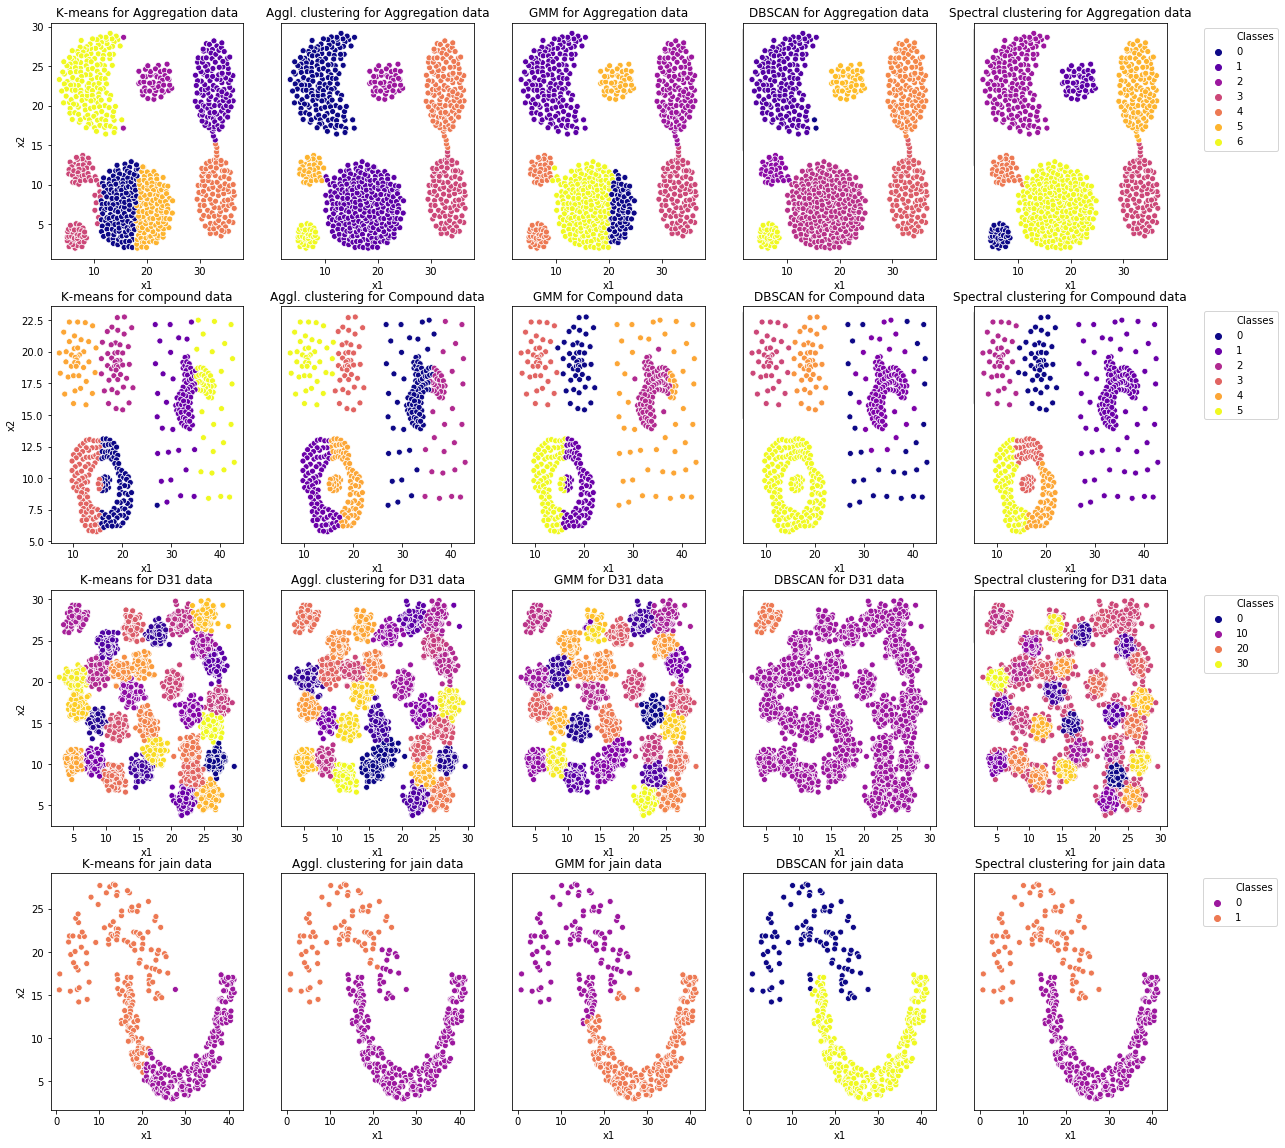

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,20))

plt.subplot(4,5,1)
#1. K-means (aggregation data)
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_aggreg)
y_kmeans = kmeans.predict(X_aggreg)
sns.scatterplot(x=aggregation.x1, y=aggregation.x2, hue=y_kmeans, palette="plasma",legend='full')
plt.title('K-means for Aggregation data')
plt.legend(title='Classes', bbox_to_anchor=(1.17, 1))

#2. Agglomerative clustering(aggregation data)
plt.subplot(4,5,2)
cluster = AgglomerativeClustering(n_clusters=7,linkage='average').fit(X_aggreg)
aggregation["Classes"]= cluster.labels_
ax = sns.scatterplot(x=aggregation.x1, y=aggregation.x2, hue=aggregation.Classes, palette="plasma",legend='full')
plt.title('Aggl. clustering for Aggregation data')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#3. GMM (aggregation data)
plt.subplot(4,5,3)
plt.title('GMM for Aggregation data')
gmm=GaussianMixture(n_components=7, covariance_type='full',tol=0.00001, max_iter=1000).fit(X_aggreg)
aggregation["Classes"]= gmm.predict(X_aggreg)
ax = sns.scatterplot(x=aggregation.x1, y=aggregation.x2, hue=aggregation.Classes, palette="plasma",legend='full')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#4. DBSCAN (aggregation data)
plt.subplot(4,5,4)
plt.title('DBSCAN for Aggregation data')
#eps - max distance between points to be considered as the same class, min_samples - The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=2, min_samples=14).fit(X_aggreg)
aggregation["Classes"]=dbscan.labels_
ax = sns.scatterplot(x=aggregation.x1, y=aggregation.x2, hue=aggregation.Classes, palette="plasma", legend='full')
#Class '-1' represents noise points.
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#5. Spectral clustering(aggregation data)
plt.subplot(4,5,5)
plt.title('Spectral clustering for Aggregation data')
spectral = SpectralClustering(n_clusters=7,
                assign_labels="discretize",
                random_state=0).fit(X_aggreg)
aggregation["Classes"]=spectral.labels_
ax = sns.scatterplot(x=aggregation.x1, y=aggregation.x2, hue=aggregation.Classes, palette="plasma",legend='full')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#6. K-means (compound data)
plt.subplot(4,5,6)
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_compound)
y_kmeans = kmeans.predict(X_compound)
sns.scatterplot(x=compound.x1, y=compound.x2, hue=y_kmeans, palette="plasma",legend='full')
plt.title('K-means for compound data')
plt.legend(title='Classes', bbox_to_anchor=(1.17, 1))

#7. Agglomerative clustering (compound data)
plt.subplot(4,5,7)
plt.title('Aggl. clustering for Compound data')
cluster = AgglomerativeClustering(n_clusters=6,linkage='ward').fit(X_compound)
compound["Classes"]= cluster.labels_
ax = sns.scatterplot(x=compound.x1, y=compound.x2, hue=compound.Classes, palette="plasma",legend='full')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#8. GMM (compound data)
plt.subplot(4,5,8)
plt.title('GMM for Compound data')
gmm=GaussianMixture(n_components=6, covariance_type='spherical',tol=0.00001, max_iter=1000).fit(X_compound)
compound["Classes"]= gmm.predict(X_compound)
ax = sns.scatterplot(x=compound.x1, y=compound.x2, hue=compound.Classes, palette="plasma",legend='full')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#9. DBSCAN (compound data)
plt.subplot(4,5,9)
plt.title('DBSCAN for Compound data')
dbscan = DBSCAN(eps=3, min_samples=25).fit(X_compound)
compound["Classes"]=dbscan.labels_
ax = sns.scatterplot(x=compound.x1, y=compound.x2, hue=compound.Classes, palette="plasma", legend='full')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#10. Spectral clustering(compound data)
plt.subplot(4,5,10)
plt.title('Spectral clustering for Compound data')
spectral = SpectralClustering(n_clusters=6,
                assign_labels="discretize",
                random_state=0).fit(X_compound)
compound["Classes"]=spectral.labels_
ax = sns.scatterplot(x=compound.x1, y=compound.x2, hue=compound.Classes, palette="plasma",legend='full')
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#11.K-means (d31 data)
plt.subplot(4,5,11)
kmeans = KMeans(n_clusters=31)
kmeans.fit(X_d31)
y_kmeans = kmeans.predict(X_d31)
d31_kmeans = sns.scatterplot(x=d31.x1, y=d31.x2, hue=y_kmeans, palette="plasma")
plt.title('K-means for D31 data')
plt.legend(title='Classes', bbox_to_anchor=(1.17, 1))

#12. Agglomerative clustering (d31 data)
plt.subplot(4,5,12)
plt.title('Aggl. clustering for D31 data')
d31cluster = AgglomerativeClustering(n_clusters=31,linkage='average').fit(X_d31)
d31["Classes"]= d31cluster.labels_
ax = sns.scatterplot(x=d31.x1, y=d31.x2, hue=d31.Classes, palette="plasma")
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#13. GMM (d31 data)
plt.subplot(4,5,13)
plt.title('GMM for D31 data')
gmm=GaussianMixture(n_components=31, covariance_type='full',tol=0.00001, max_iter=1000).fit(X_d31)
d31["Classes"]= gmm.predict(X_d31)
ax = sns.scatterplot(x=d31.x1, y=d31.x2, hue=d31.Classes, palette="plasma")
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#14. DBSCAN (d31n data)
plt.subplot(4,5,14)
plt.title('DBSCAN for D31 data')
dbscan = DBSCAN(eps=2, min_samples=20).fit(X_d31)
d31["Classes"]=dbscan.labels_
ax = sns.scatterplot(x=d31.x1, y=d31.x2, hue=d31.Classes, palette="plasma")
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#15. Spectral clustering(d31 data)
plt.subplot(4,5,15)
plt.title('Spectral clustering for D31 data')
spectral = SpectralClustering(n_clusters=31,
                assign_labels="kmeans",
                random_state=0).fit(X_d31)
d31["Classes"]=spectral.labels_
ax = sns.scatterplot(x=d31.x1, y=d31.x2, hue=d31.Classes, palette="plasma")
plt.legend(bbox_to_anchor=(1.17, 1))
ax.get_yaxis().set_visible(False)

#16. K-means (jain data)
plt.subplot(4,5,16)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_jain)
y_kmeans = kmeans.predict(X_jain)
jain_kmeans = sns.scatterplot(x=jain.x1, y=jain.x2, hue=y_kmeans, palette="plasma", legend=False)
plt.title('K-means for jain data')

#17. Agglomerative clustering (jain data)
plt.subplot(4,5,17)
plt.title('Aggl. clustering for jain data')
cluster = AgglomerativeClustering(n_clusters=2,linkage='complete').fit(X_jain)
jain["Classes"]= cluster.labels_
ax = sns.scatterplot(x=jain.x1, y=jain.x2, hue=jain.Classes, palette="plasma",legend=False)
ax.get_yaxis().set_visible(False)

#18. GMM (jain data)
plt.subplot(4,5,18)
plt.title('GMM for jain data')
gmm=GaussianMixture(n_components=2, covariance_type='tied',tol=0.001, max_iter=100).fit(X_jain)
jain["Classes"]= gmm.predict(X_jain)
ax = sns.scatterplot(x=jain.x1, y=jain.x2, hue=jain.Classes, palette="plasma",legend=False)
ax.get_yaxis().set_visible(False)

#19. DBSCAN (jain data)
plt.subplot(4,5,19)
plt.title('DBSCAN for jain data')
dbscan = DBSCAN(eps=2, min_samples=20).fit(X_jain)
jain["Classes"]=dbscan.labels_
ax = sns.scatterplot(x=jain.x1, y=jain.x2, hue=jain.Classes, palette="plasma", legend=False)
ax.get_yaxis().set_visible(False)

#20. Spectral clustering(jain data)
plt.subplot(4,5,20)
plt.title('Spectral clustering for jain data')
spectral = SpectralClustering(n_clusters=2,
                assign_labels="kmeans",
                random_state=0).fit(X_jain)
jain["Classes"]=spectral.labels_
ax = sns.scatterplot(x=jain.x1, y=jain.x2, hue=jain.Classes, palette="plasma",legend='full')
plt.legend(bbox_to_anchor=(1.6, 1))
ax.get_yaxis().set_visible(False)

For **Aggregation** data set agglomerative clustering and spectral clustering performs the best because of the non-elliptical shape of the data. While DBSCAN also clusters data correctly, it identifies two points as noise because of the sparse density in that region.<br>
For **Compound** data DBSCAN performs the best despite, but because of the sparsity of the data on the left side, DBSCAN identifies all of those points as noise. In addition, because of it's a dependency of the $\epsilon$ value, it is hard to tune the model in a way to separate the clusters 2 and 3 which are close to each other and simultaneously separate clusters 4 and 5 which are further apart.<br>
For **k31** set, k-means, agglomerative clustering, and GMM performs very well due to the globular shapes of the data and constant density.<br>
For **Jain** data set, spectral clustering correctly identifies all points because calculates the similarity whereas DBSCAN, based on proximity, identifies a few points incorrectly.


## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

In [10]:
import sklearn.datasets
sklearn.datasets.load_digits()
from sklearn.datasets import load_digits
digits = load_digits()
y=digits.target
X=digits.images
X_reshaped=np.reshape(X, (1797,64))

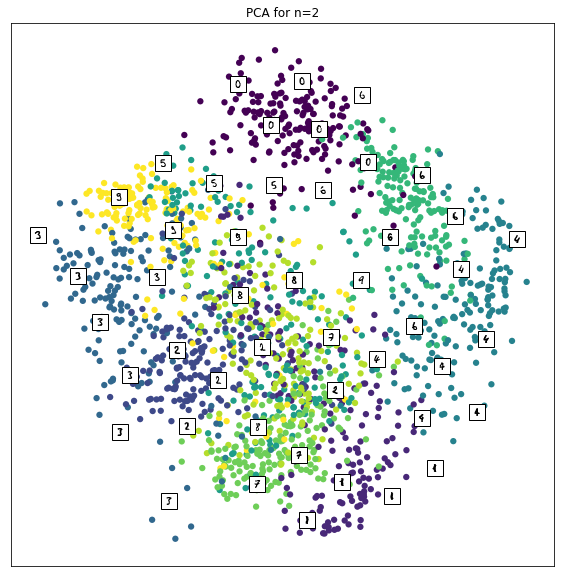

Performance time: 0.2823 sec


In [11]:
#REFERENCE: https://pythonmachinelearning.pro/dimensionality-reduction/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis
import time
 
digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
 
def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
 
    plt.figure(figsize=(10,10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
 
    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
 
    plt.xticks([]), plt.yticks([])
    plt.title(title)

time1=time.time()
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA for n=2")
plt.show()
time2=time.time()
print("Performance time:", round(time2-time1,4),'sec')

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

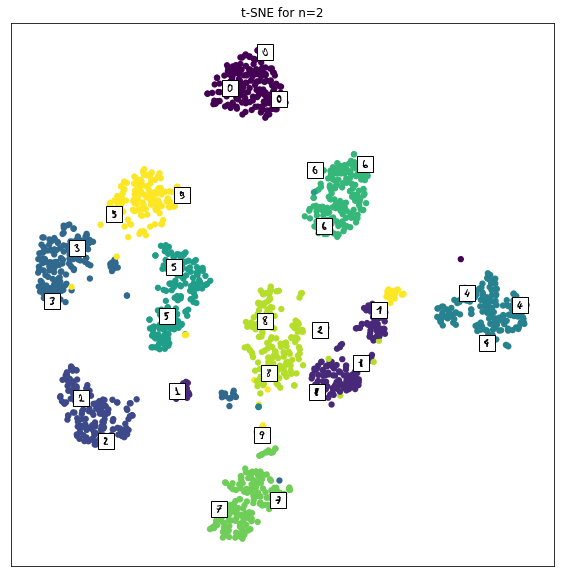

Performance time: 33.8732 sec


In [12]:
time1=time.time()
tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
embedding_plot(tsne,"t-SNE for n=2")
plt.show()
time2=time.time()
print("Performance time:", round(time2-time1,4),'sec')


**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

While t-SNE clustering separates data significantly better because of the data non-linearity, the performance time is 100 times longer.

PCA and tSNE algorithms use different approaches: PCA preserves large pairwise distances to maximize the variance, whereas tSNE preserves only small pairwise distances or local similarities which leads to better visualization of high-dimensional datasets. tSNE is **not** a clustering technique, since it does not preserve the inputs, meaning after it processes the input features are no longer identifiable, and none of the inference could be made based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.

The major drawback of PCA is that does not perform well on non-linear high-dimensional data. However, in contrast with tSNE, PCA can be computed iteratively and principal component vectors tell a story about the original data: which variables account for the most or least variation.

**ANSWER**

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

In [13]:
import sklearn.datasets
sklearn.datasets.load_digits()
from sklearn.datasets import load_digits
digits = load_digits()
y=digits.target
X=digits.images
index5 = np.where(y==5)
fives = index5[0][:20]

3.a) 



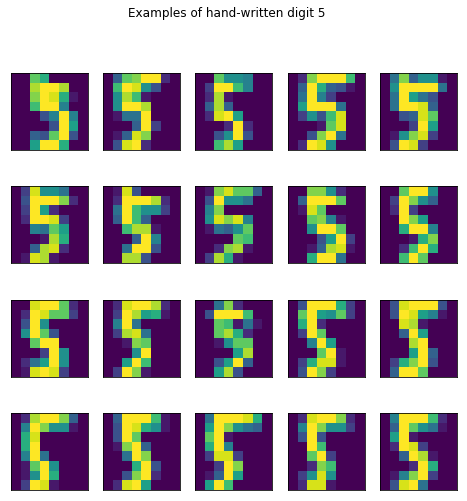

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,8)) # figure size in inches
plt.suptitle('Examples of hand-written digit 5')
print ('3.a) \n')
for i in range(20):
    ax = fig.add_subplot(4,5, i + 1, xticks=[], yticks=[])
    ax.imshow(X[fives[i]])

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

In [15]:
all_5=[]
for i in index5:
    all_5.append(X[i])
#Reshape the data to 2D array set to perform PCA
all_5=np.reshape(all_5, (182,64))

Text(43,0.95,'Explained variance')

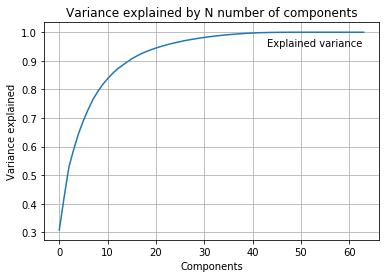

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64, svd_solver='full', random_state=1000)
pca = pca.fit(all_5)
#Percentage of variance exaplained for 64 components = 1
var=np.sum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Variance explained by N number of components")
plt.xlabel('Components')
plt.ylabel('Variance explained')
plt.grid()
plt.text(x=43, y=0.95, s='Explained variance')

In [17]:
pca = PCA(n_components=5, svd_solver='full', random_state=1000)
pca = pca.fit(all_5)
var5=np.sum(pca.explained_variance_ratio_)

pca = PCA(n_components=10, svd_solver='full', random_state=1000)
pca = pca.fit(all_5)
var10=np.sum(pca.explained_variance_ratio_)

pca = PCA(n_components=30, svd_solver='full', random_state=1000)
pca = pca.fit(all_5)
var30=np.sum(pca.explained_variance_ratio_)

print(round(var5,3),round(var10,3),round(var30,3))

0.646 0.817 0.979


From the graph above we observe that 64 components explain all 100% of the variance. However, 30 components explain 97.9% of the variance and with 10 components explain 81.7% of the variance.

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

Text(1,8.5,'Original image')

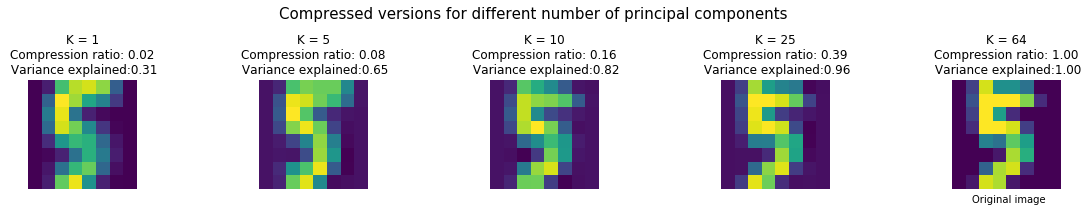

In [18]:
plt.figure(figsize=(20,2))
for n,k in enumerate([1,5,10,25,64]):    
    pca = PCA(n_components=k).fit(all_5) #fitting k components
    pca_transposed = pca.transform(all_5)
    projected = pca.inverse_transform(pca_transposed)
    plt.subplot(1,5,n+1)
    var=round(np.sum(pca.explained_variance_ratio_),3)
    plt.imshow(np.reshape(projected[5],(8,8)))
    plt.title('K = %d\nCompression ratio: %.2f\n Variance explained:%.2f' %(k,k/64,var))
    plt.axis('off')
plt.text(x=-50, y=-5, s='Compressed versions for different number of principal components', size = 15)
plt.text(x=1, y=8.5, s='Original image', size = 10)

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

The smallest, therefore, the best value of compression ratio = 0.02 is achieved for k=1, however, the explained variance is relatively low = 0.31. <br>
For k = 5, the approximation is significantly improved increasing the value of explained variance twice while compression ratio remains small = 0.08.<br>
While k = 25 components explain 96% of the variability, k = 10 components explain 82% of variability and is a better choice because it achieves more than two times smaller compression ratio value of 0.16 over 0.39 for k = 25 components.<br>
Therefore, k = 10 principle components is required to well-approximate the data.<br>

**ANSWER**

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

In [19]:
import numpy as np

class NeuralNetwork:
    def __init__(self, inputLayer = 2, hiddenLayer1= 5, hiddendLayer2 = 5, outputLayer = 1, max_iter = 5000, lr = 0.01):
        np.random.seed(100)
        self.inputLayer = inputLayer
        self.hiddenLayer1 = hiddenLayer1
        self.hiddenLayer2 = hiddendLayer2
        self.outputLayer = outputLayer
        self.max_iter = max_iter
        self.lr = lr
        #Initialize random weights
        self.W1 = np.random.randn(self.inputLayer+1, self.hiddenLayer1)
        self.W2 = np.random.randn(self.hiddenLayer1, self.hiddenLayer2)
        self.W3 = np.random.randn(self.hiddenLayer2, self.outputLayer)
    
    def sigmoid(self, z):
        #Activation function
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1 + np.exp(-z))**2)

    def predict_proba(self, X):
        #Moving inputs forward through the network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.W3)
        #Get estimation from Propogation
        yHat = self.sigmoid(self.z4)
        return yHat
    
    def cost(self, X, y):
        #Calcluate the cost
        self.yHat = self.predict_proba(X)
        cost = 0.5 * sum((y - self.yHat)**2)
        return cost
    
    def fit(self, X, y):
        #Backpropagation by calculating the derivatives on weights and train the neural network
        for i in range(self.max_iter): 
            self.yHat = self.predict_proba(X)
            delta4 = np.multiply((y-self.yHat), self.sigmoidPrime(self.z4))
            dJdW3 = np.dot(self.a3.T, delta4)
            self.W3 += self.lr * dJdW3
            delta3 = np.dot(delta4, self.W3.T)*self.sigmoidPrime(self.z3)
            dJdW2 = np.dot(self.a2.T, delta3)
            self.W2 += self.lr * dJdW2
            delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
            dJdW1 = np.dot(X.T, delta2) 
            self.W1 += self.lr * dJdW1
            
    def predict(self,X):
        #Predict function
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.a3,self.W3)
        self.yHat = self.sigmoid(self.z4)
        y_predict = self.yHat
        y_predict[y_predict >= 0.5] = 1
        y_predict[y_predict < 0.5] = 0
        return y_predict
    
        

(b) Create a training and test dataset using sklearn.datasets.make_moons(N, noise=0.20), where  Ntrain=500Ntrain=500  and  Ntest=100Ntest=100 . Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

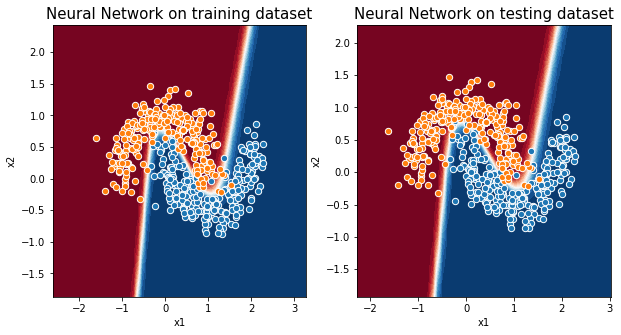

In [20]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples = 500, noise = 0.2, random_state = 100)
X_test, y_test = make_moons(n_samples = 100, noise = 0.2, random_state = 100)
bias_train = np.ones((X_train.shape[0], 1))
bias_test = np.ones((X_test.shape[0], 1))
X_train = np.hstack((X_train, bias_train))
y_train = y_train.reshape(-1, 1)
X_test = np.hstack((X_test, bias_test))
y_test = y_test.reshape(-1, 1)

#Fit the Neural Network model
NN = NeuralNetwork()
NN.fit(X_train,y_train)

#Apply the model on training data and make a plot
X_min_train, X_max_train = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_train, y_max_train = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(X_min_train, X_max_train, 0.1), np.arange(y_min_train, y_max_train, 0.1))
pred = NN.predict_proba(np.c_[XX.reshape(-1, 1), yy.reshape(-1, 1), np.ones((XX.reshape(-1, 1).shape[0], 1))])
yHat = pred.reshape(yy.shape)

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
contour = plt.contourf(XX, yy, yHat, 25, cmap="RdBu", vmin=0, vmax=1)
plt.scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], s=40, cmap="RdBu", label="class_1", edgecolor="white", linewidth=1)
plt.scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], s=40, cmap="RdBu", label="class_0", edgecolor="white", linewidth=1)
plt.xlabel("x1", fontsize = 10)
plt.ylabel("x2", fontsize = 10)
plt.title("Neural Network on training dataset", fontsize = 15)


#Apply the model on testing data and make a plot
X_min_test, X_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(X_min_test, X_max_test, 0.1), np.arange(y_min_test, y_max_test, 0.1))
pred = NN.predict_proba(np.c_[XX.reshape(-1, 1), yy.reshape(-1, 1), np.ones((XX.reshape(-1, 1).shape[0], 1))])
yHat = pred.reshape(yy.shape)

plt.subplot(1, 2, 2)
contour = plt.contourf(XX, yy, yHat, 25, cmap="RdBu", vmin=0, vmax=1)
plt.scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1], s=40, cmap="RdBu", label="class_1", edgecolor="white", linewidth=1)
plt.scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], s=40, cmap="RdBu", label="class_0", edgecolor="white", linewidth=1)
plt.xlabel("x1", fontsize = 10)
plt.ylabel("x2", fontsize = 10)
plt.title("Neural Network on testing dataset", fontsize = 15)
plt.show()

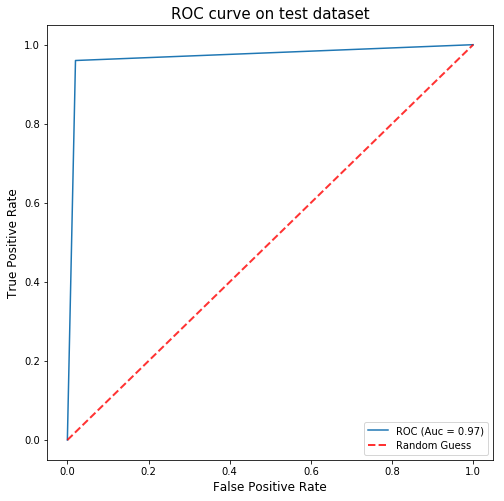

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred = NN.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fig = plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label="ROC (Auc = %0.2f)" % (auc))
plt.plot([0, 1], [0, 1], linestyle="--", lw = 2, color="r", label="Random Guess", alpha = 0.8)
plt.title('ROC curve on test dataset', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend()
plt.show()

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

The performance could be improved by increasing the number of hidden layers or increasing the number of nodes.